In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"mod_NBER-CES Manufacturing Industry Database (sic5811).xls")

In [9]:
df.head()

,sic,year,emp,pay,dtfp5,dtfp4
0,2011,1958,200.9,1067.8,NaN,NaN
1,2011,1959,197.2,1101.0,0.033,0.033
2,2011,1960,194.2,1138.6,0.049,0.049
3,2011,1961,189.3,1143.2,-0.016,-0.016
4,2011,1962,185.6,1161.1,0.003,0.003


In [3]:
device_sic = [3693, 3841, 3842, 3843, 3851]  #From Managing the Medical Arms Race

In [4]:
# Dataframe with target device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

# Dataframe without target device SIC codes
other_df = df.loc[~filt]

In [5]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

## Annual Change in 5-factor Total Factor Productivity

In [123]:
#Produce dictionary of data
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, (2011 + 1)): # Ranges are not inclusive of the last value
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())
    
productivity_df = pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012))))

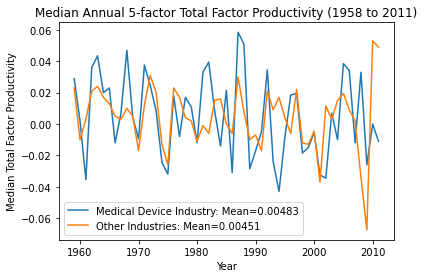

In [135]:
fig, ax = plt.subplots()
plt.plot(productivity_df)
    
plt.legend(["Medical Device Industry: Mean={}".format(str(round(productivity_df["Medical Device Industry"].mean(), 5))), 
            "Other Industries: Mean={}".format(str(round(productivity_df["Other Industries"].mean(), 5)))], 
            loc ="lower left")
plt.xlabel("Year")
plt.ylabel("Median Total Factor Productivity")
plt.title("Median Annual 5-factor Total Factor Productivity (1958 to 2011)")
    
ax.tick_params(labelrotation=0)

plt.show()

## Annual Change in Variable Sums

In [34]:
def plot_function(data_df, title):
    fig, ax = plt.subplots()
    plt.plot(data_df)
    
    plt.legend(["Medical Device Industry: Mean={}%".format(str(round(data_df["Medical Device Industry"].mean(), 2))), 
                "Other Industries: Mean={}%".format(str(round(data_df["Other Industries"].mean(), 2)))], 
               loc ="lower left")
    plt.xlabel("Year")
    plt.ylabel("Percent Change")
    plt.title(title)
    
    ax.tick_params(labelrotation=0)
    
    return(plt.show())

In [115]:
# Sums given varible for each year in device and non-device SIC codes. Returns DF with year-over-year change.
def find_delta_with_sums(device_years_inner, other_years_inner, column, start_year=1958, end_year=2011):
    data_dict = {"Medical Device Industry":[], "Other Industries":[]}
    
    device_list = [device_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]  # Ranges are not inclusive of the last value
    other_list = [other_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]
    
    for i in range(len(range(start_year, end_year))):
        data_dict["Medical Device Industry"].append(((device_list[i + 1]/device_list[i])-1)*100)  #Previous year divided by current year for ratio
        data_dict["Other Industries"].append(((other_list[i + 1]/other_list[i])-1)*100)
    
    return pd.DataFrame.from_dict(data_dict).set_index(pd.Index(list(range(start_year+1, end_year+1))))

### Employment

<AxesSubplot:>

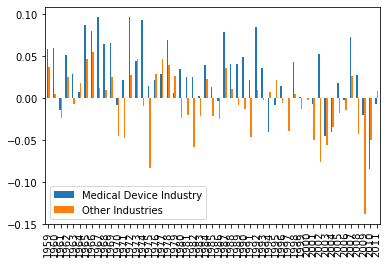

In [16]:
pd.DataFrame.from_dict(find_delta_with_sums(device_years, other_years, "emp")).set_index(pd.Index(list(range(1959, 2012)))).plot(kind='bar')

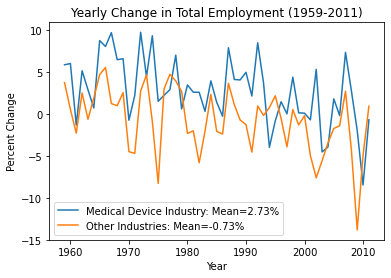

In [120]:
employment_dict = find_delta_with_sums(device_years, other_years, column="emp", start_year=1958, end_year=2011)
plot_function(employment_dict, "Yearly Change in Total Employment (1959-2011)")

### Total Payroll

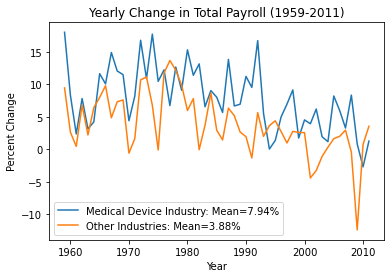

In [121]:
pay_dict = find_delta_with_sums(device_years, other_years, column="pay")
plot_function(pay_dict, "Yearly Change in Total Payroll (1959-2011)")